<a href="https://colab.research.google.com/github/jeanmichael1993/Desafio_3_BootcampAnalistaDados/blob/master/Desafio_3_BoocampAnalistaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto Varejo**

A indústria automotiva é uma das mais importantes e complexas do mundo, e a venda de carros é um fator crucial para o sucesso das montadoras. Os preços dos carros podem variar significativamente, dependendo do modelo, da marca, do ano de fabricação, das características específicas do veículo e de outros fatores, como a região em que é vendido.

Para os consumidores, a escolha de um carro envolve uma série de decisões importantes, incluindo a escolha do modelo, da marca, do tipo de motor, da cor, do preço e de outros fatores.

O uso de técnicas de machine learning pode trazer diversas vantagens para a indústria automotiva, como a possibilidade de criar modelos mais precisos e eficientes para a previsão de preços, a identificação de padrões e tendências de mercado, a segmentação de clientes e a personalização de ofertas.


Seu objetivo é ajudar o time vendas a prevero o preço quanto será vendido os carros em estoque.

**Descrição dos dados:**
1. **Car_Name**	- Nome do Carro
2. **Year**	- Ano de frabricação
3. **Selling_Price** - Preço que foi vendido **(TARGET)**
4. **Present_Price**	- Preço de Tabela
5. **Kms_Driven**	- Kilometragem rodada
6. **Fuel_Type**	- Tipo do combustível
7. **Seller_Type**	- Tipo do Revendedor
8. **Transmission**	- Tipo do cambio
9. **Owner** - Número de proprietários

#Exploração Dados padrão

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_car = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/arquivos/car_data.csv', sep=',')

In [3]:
base_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
base_car.shape

(301, 9)

In [5]:
base_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
base_car.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [7]:
base_car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
base_car.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

#Análise Explorátoria

In [9]:
base_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
base_car.groupby(by ='Seller_Type')['Seller_Type'].count()

Seller_Type
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [11]:
base_car.groupby(by='Fuel_Type')['Fuel_Type'].count()

Fuel_Type
CNG         2
Diesel     60
Petrol    239
Name: Fuel_Type, dtype: int64

In [12]:
base_car.groupby(by='Transmission')['Transmission'].count()

Transmission
Automatic     40
Manual       261
Name: Transmission, dtype: int64

In [13]:
base_car.groupby(by='Owner')['Owner'].count()

Owner
0    290
1     10
3      1
Name: Owner, dtype: int64

In [14]:
seller_type_counts = base_car['Seller_Type'].value_counts()
fuel_type_counts = base_car['Fuel_Type'].value_counts()
transmission_counts = base_car['Transmission'].value_counts()
owner_counts = base_car['Owner'].value_counts()

In [15]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

# Criar os gráficos individuais
fig1 = px.bar(seller_type_counts, x=seller_type_counts.index, y='count',
             title='Quantidade de carros por tipo de revendedor',
             labels={'x': 'Tipo de revendedor', 'y': 'Quantidade'}
              )
fig2 = px.bar(fuel_type_counts, x=fuel_type_counts.index, y='count',
             title='Quantidade de carros por tipo de combustível',
             labels={'x': 'Tipo do combustível', 'y': 'Quantidade'})
fig3 = px.bar(transmission_counts, x=transmission_counts.index, y='count',
             title='Quantidade de carros por tipo de câmbio',
             labels={'x': 'Tipo do câmbio', 'y': 'Quantidade'})
fig4 = px.bar(owner_counts, x=owner_counts.index, y='count',
             title='Quantidade de carros por número de proprietários',
             labels={'x': 'Número de proprietários', 'y': 'Quantidade'})

# Criar o grid de gráficos
fig = make_subplots(rows=2, cols=2)

# Adicionar os gráficos ao grid
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig3['data'][0], row=2, col=1)
fig.add_trace(fig4['data'][0], row=2, col=2)

# Atualizar layout
fig.update_layout(height=800, width=1000, title_text="Grid de Gráficos")

# Personalizar cores e estilo
for trace in fig.data:
    trace.marker.color = 'red'  # Definir a cor das colunas como vermelho
    trace.marker.line.color = 'black'  # Definir a cor da borda das colunas como preto

# Adicionar títulos acima de cada gráfico de barras
fig.update_layout(
    annotations=[
        dict(text="Tipo de revendedor", x=0.25, y=1.05, xref="paper", yref="paper", showarrow=False),
        dict(text="Tipo de combustível", x=0.75, y=1.05, xref="paper", yref="paper", showarrow=False),
        dict(text="Tipo de câmbio", x=0.25, y=0.5, xref="paper", yref="paper", showarrow=False),
        dict(text="Número de proprietários", x=0.75, y=0.5, xref="paper", yref="paper", showarrow=False)
    ]
)

# Mostrar o grid de gráficos
fig.show()


In [16]:
import altair as alt

# Definindo a seleção de intervalo
interval = alt.selection_interval()

# Gráfico de barras para Seller_Type
bar1 = alt.Chart(base_car).mark_bar().encode(
    x = alt.X('Seller_Type'),
    y = alt.Y('count()'),
    tooltip = ('Seller_Type', 'count()'),
    color = alt.condition(interval, 'Seller_Type', alt.value('lightgray'))
).properties(
    width = 150
).add_selection(
    interval
)

# Gráfico de barras para Fuel_Type
bar2 = alt.Chart(base_car).mark_bar().encode(
    x = alt.X('Fuel_Type'),
    y = alt.Y('count()'),
    tooltip = ('Fuel_Type', 'count()'),
    color = alt.condition(interval, 'Fuel_Type', alt.value('lightgray'))
).properties(
    width = 150
).add_selection(
    interval
)

# Gráfico de barras para Transmission
bar3 = alt.Chart(base_car).mark_bar().encode(
    x = alt.X('Transmission'),
    y = alt.Y('count()'),
    tooltip = ('Transmission', 'count()'),
    color = alt.condition(interval, 'Transmission', alt.value('lightgray'))
).properties(
    width = 150
).add_selection(
    interval
)

# Gráfico de barras para Owner
bar4 = alt.Chart(base_car).mark_bar().encode(
    x = alt.X('Owner'),
    y = alt.Y('count()'),
    tooltip = ('Owner', 'count()'),
    color = alt.condition(interval, 'Owner', alt.value('lightgray'))
).properties(
    width = 150
).add_selection(
    interval
)

# Juntando os gráficos
(bar1 | bar2 | bar3 | bar4)


alt.HConcatChart(...)

In [17]:
base_car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [18]:
wd = 200
hg = 400

interval = alt.selection_interval()

box1 = alt.Chart(base_car).mark_boxplot().encode(
    x='Fuel_Type',
    y='Selling_Price',
    color='Fuel_Type',
).properties(
     width=wd,
    height=hg,
    title=alt.TitleParams(text="Boxplot por Tipo do combustível")
).add_selection(
    interval
)

box2 = alt.Chart(base_car).mark_boxplot().encode(
    x='Seller_Type',
    y='Selling_Price',
    color='Seller_Type'
).properties(
     width=wd,
    height=hg,
    title=alt.TitleParams(text="Boxplot por Tipo do Revendedor")
).add_selection(
    interval
)

box3 = alt.Chart(base_car).mark_boxplot().encode(
    x='Transmission',
    y='Selling_Price',
    color='Transmission'
).properties(
     width=wd,
    height=hg,
    title=alt.TitleParams(text="Boxplot por Tipo do cambio")
).add_selection(
    interval
)

box4 = alt.Chart(base_car).mark_boxplot().encode(
    x='Owner',
    y='Selling_Price',
    color='Owner'
).properties(
     width=wd,
    height=hg,
    title=alt.TitleParams(text="Boxplot por Número de Proprietários")
).add_selection(
    interval
)

box1 | box2 | box3 | box4

alt.HConcatChart(...)

#Preparação de dados

In [19]:
#verificar os tipos dos dados
base_car.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

#Instanciação
le_fuel_type = LabelEncoder()
le_seller_type = LabelEncoder()
le_transmission = LabelEncoder()

#Fit(treinar)
le_fuel_type.fit(base_car['Fuel_Type'].drop_duplicates())
le_seller_type.fit(base_car['Seller_Type'].drop_duplicates())
le_transmission.fit(base_car['Transmission'].drop_duplicates())

#Transfomar
base_car['Fuel_Type'] = le_fuel_type.transform(base_car['Fuel_Type'])
base_car['Seller_Type'] = le_seller_type.transform(base_car['Seller_Type'])
base_car['Transmission'] = le_transmission.transform(base_car['Transmission'])

base_car.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [21]:
# Analisando o fit
le_fuel_type.classes_, le_seller_type.classes_, le_transmission.classes_

(array(['CNG', 'Diesel', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object))

In [22]:
base_car_corr = base_car.drop(['Car_Name'], axis =1)

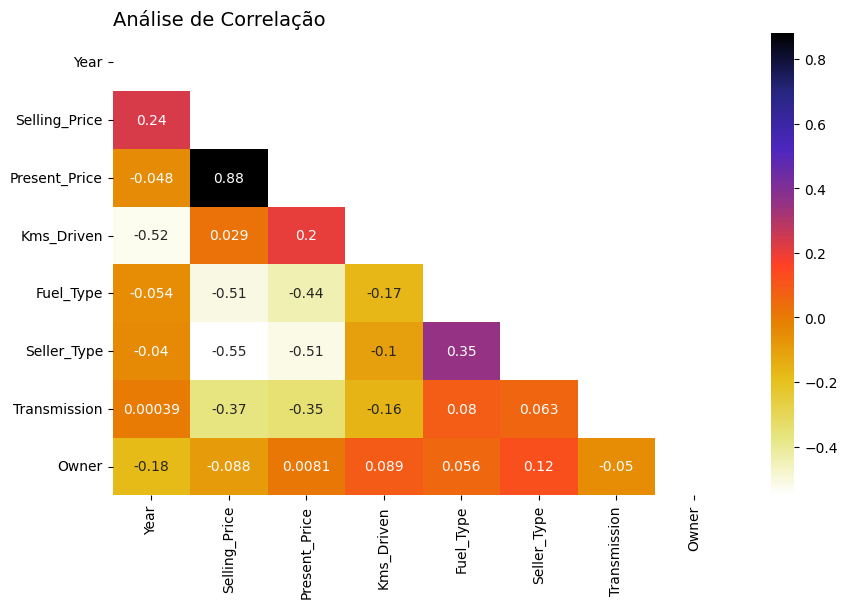

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot
Figura, Eixo = plt.subplots( figsize=(10, 6) )

# Calculando Coor
Correlacao = base_car_corr.corr()

# Gere uma máscara para o triângulo superior
mask = np.zeros_like( Correlacao )
mask[ np.triu_indices_from(mask) ] = True

# Titulo
plt.title('Análise de Correlação', loc='left', fontsize=14)

# Plot
sns.heatmap(
    Correlacao,
    mask=mask,
    cmap='CMRmap_r',
    annot=True,
    );

#Criação do Modelo

In [28]:
#Separar Eixo_X e Eixo_Y
X = base_car.drop(columns = ['Car_Name', 'Selling_Price'])
Y = base_car['Selling_Price']

X.shape

(301, 7)

In [29]:
Y.shape

(301,)

In [111]:
from sklearn.model_selection import train_test_split
melhor_random = 0
melhor_R2 = 999
for i in range(1,200):
  x_train, x_test, y_train, y_test = train_test_split(
      X,Y,
      test_size=0.3,
      random_state=i
  )

  modelo_linear = LinearRegression()
  modelo_linear.fit(x_train, y_train)
  Previsoes = modelo_linear.predict( x_test )
  R2 = mean_absolute_error( y_test, Previsoes )
  if R2 < melhor_R2:
    melhor_R2 = R2
    melhor_random = i

print(melhor_random, melhor_R2)


67 0.9350331331509265


In [112]:
#Divisão treino/teste
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X,Y,
    test_size=0.3,
    random_state=67
)


In [113]:
from sklearn.linear_model import LinearRegression

#Treino do modelo preditivo

modelo_linear = LinearRegression()
modelo_linear.fit(x_train, y_train)

#Variáveis de caracteristicas
modelo_linear.feature_names_in_

array(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'], dtype=object)

In [114]:
# Previsoes para testar nossa modelo preditivo
Previsoes = modelo_linear.predict( x_test )

In [115]:
# Avaliar todas as métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#0 a 1 -> quanto maior é melhor
R2 = modelo_linear.score( x_test, y_test )
#registro por registro e mede a media de cada, quanto maior pior
MAE = mean_absolute_error( y_test, Previsoes )
#pega o MAE e eleva ao quadrado para maximizar o erro
MSE = mean_squared_error( y_test, Previsoes )
#raiz quadrada do valor MSE, valor do dado igua o MAE
RMSE = mean_squared_error( y_test, Previsoes, squared=False )
#mostra o erro em % das medias do erro absoluto em relação aos valores reais
MAPE = mean_absolute_percentage_error(y_test, Previsoes) * 100

Dicionario = {
    'R²' : round( R2, 6 ),
    'MAE' : round(MAE, 6),
    'MSE' : round(MSE, 6),
    'RMSE' : round(RMSE, 6),
    'MAPE' : round(MAPE, 6)
}

pd.DataFrame( Dicionario, index=[0] ).transpose().rename( columns={0:'Valor da métrica'} )

,Valor da métrica
R²,0.906575
MAE,0.935033
MSE,1.672529
RMSE,1.293263
MAPE,82.254676


In [116]:
y_test[0:5].values

array([0.35, 7.25, 7.45, 0.45, 2.75])

In [117]:
Previsoes[0:5]

array([-0.41158967,  7.02747572,  7.26339476,  1.45246524,  3.72885238])

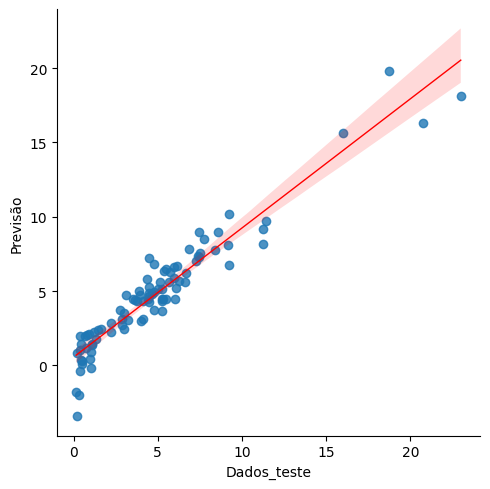

In [118]:
# Analise da previsão x real
#quantos mais bolinhas tiver perto da linha melhor
Dicionario = {
    'Dados_teste' : y_test,
    'Previsão' : Previsoes
}

Dados_Dicionario = pd.DataFrame( Dicionario )

sns.lmplot(
    data=Dados_Dicionario,
    x='Dados_teste',
    y='Previsão',
    line_kws={ 'color':'red', 'lw':1 }
);

Usando Validação Cruzada

In [93]:
# Função validação cruzada
#para verificar se teve alguma coisa errada nos dados.
from sklearn.model_selection import cross_val_score

model = LinearRegression()

# Rodar em partes
Scores = cross_val_score(
    model,
    X,
    Y,
    cv=5,
    scoring='r2'
)

print(f'Média final: { round( np.mean(Scores), 2 ) }')

Média final: -18.31


In [119]:
Scores

array([  0.83482494,   0.77512003, -94.61105213,   0.61088628,
         0.83892197])